# Data management project: How to choose the best accomodation for your vacation in Belgium?
# Part 2: Visualisation
**By Iman Ajdamova and Pauline Colle**

## Introduction

When chosing accommodation for the holidays, people are usually looking at different features. On this part of the assignment we are going to compare the data collected on the webscrapping part that corresponds to different features to see if they is a link between some of them. For example, we will look at if there is a link between the rating and the price and thus if a higher price is justified by a higher rating or not. Other same comparison will be realised.

## Import the packages 

In [1]:
from IPython.display import display
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = 700

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import the Data Frame

In [2]:
df = pd.read_excel('C:/Users/32498/Downloads/ECON2206-Data-Management-2023-main/GitHub/Project-data/Abritel_merged.xlsx')

**Creation of a column representing the price per night per person for comparison:**

In [3]:
df['Price person']=df['Price per Night']/df['Number of Guests']
df.tail()

,Name,Type,hote premium,Price per Night,Total Price,Rating,Appreciations,Type of annoucement,Number of Guests,Number of Bedrooms,Number of Beds,lieu,latitude,longitude,Price person
418,3 N appartement,Appartement,0,113,1472,0.0,0,Particulier,6,2,1,Eupen,50.630567,6.031272,18.833333
419,Appartement Van Hecke dans le centre-ville d'A...,Appartement,0,165,2143,0.0,0,Annonce professionnelle,2,1,0,Sint-Andries,51.192022,3.178019,82.500000
420,Villa Oostduinkerke,Villa,0,89,1156,0.0,0,Particulier,6,3,4,Oostduinkerke,51.115634,2.681266,14.833333
421,"Appartement privé sise à Chaussée de Haecht, 3...",Appartement,0,129,1678,3.5,2,Particulier,4,2,3,Collignon,50.867604,4.373712,32.250000
422,Smartflats Manneken Pis V - 1 Chambre - Centre...,Appartement,0,216,2809,3.3,3,Annonce professionnelle,2,1,1,Quartier du Centre - Centrumwijk,50.846718,4.353221,108.000000


**Converting the required data to type float in order to use them in graphics and maps:**


In [4]:
df['Price per Night'] = df['Price per Night'].astype(float)
df['Total Price'] = df['Total Price'].astype(float)
df['Rating'] = df['Rating'].astype(float)
df['Appreciations'] = df['Appreciations'].astype(float)

df['Number of Guests'] = df['Number of Guests'].astype(float)
df['Number of Bedrooms'] =df['Number of Bedrooms'].astype(float)
df['Number of Beds'] = df['Number of Beds'].astype(float)
df['Price person']=df['Price person'].astype(float)

## 1.Proportion of each type of accommodation

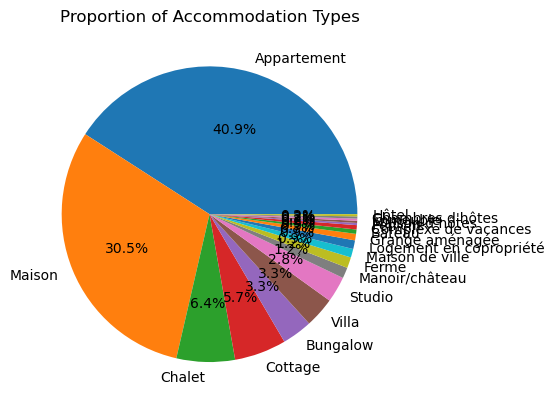

In [5]:
type_counts = df['Type'].value_counts()
type_percentages = (type_counts / type_counts.sum()) * 100

plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Accommodation Types')
plt.show()

**Interpretation**

We see that there are way more houses and apartment than the other types of accommodation. Therefore, when choosing an accommodation, customer that want a specific type of housing that is  rarer on the market, such as a cottage, should be aware that it will be more difficult to find and they will have less choice.

## 2. Does the rating impact the price of the location?

### The average prices of rentings based on their rating:

In [6]:
mean_prices = df.groupby('Rating')['Price person'].mean()

mean_prices_df = pd.DataFrame({'Rating': mean_prices.index, 'Mean Price': mean_prices.values})
mean_prices_df

,Rating,Mean Price
0,0.0,36.008033
1,1.0,30.450000
2,1.3,25.000000
3,2.0,14.750000
4,2.3,37.200000
5,2.7,20.500000
6,3.0,48.705556
7,3.2,17.500000
8,3.3,60.625000
9,3.4,36.500000


**Observations**: when looking at what the mean prices is for each level of rating, we see that there is not especially an ascending order, but this might be due to some outliers. Let's take a closer look at this relationship.

### Plotting the prices and the rating

#### A. Scatterplot

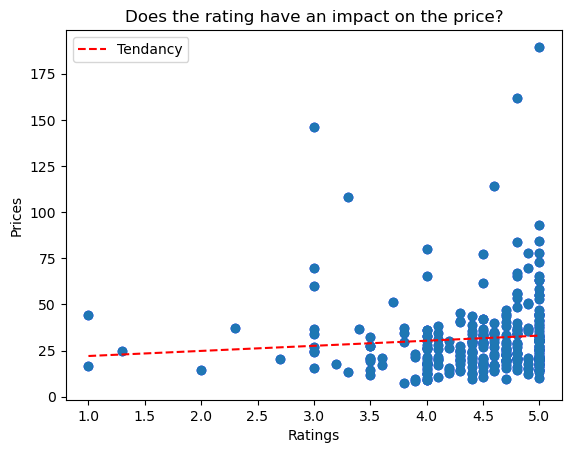

In [7]:
#Removing the rating of 0 because it is accommodations that don't have a rating yet, so it falses the data
sorted_df = df.copy()
sorted_df = df.sort_values('Rating', ascending=True)
sorted_df = sorted_df[sorted_df['Rating'] != 0]


x = sorted_df["Rating"]
y = sorted_df["Price person"]


x_sorted, y_sorted = zip(*sorted(zip(x, y)))
# Create the scatter plot
plt.scatter(x_sorted, y_sorted, color='blue')

# Fit a linear regression model to the data
model = np.polyfit(x_sorted, y_sorted, 1)
predict = np.poly1d(model)

# Create a range of x values to use for plotting the regression line
x_range = np.linspace(min(x_sorted), max(x_sorted), 100)

# Plot the scatter plot and the regression line
plt.scatter(x_sorted, y_sorted)
plt.plot(x_range, predict(x_range), color='r', linestyle='--', label='Tendancy')

plt.title('Does the rating have an impact on the price?')
plt.xlabel('Ratings')
plt.ylabel('Prices')
plt.legend()

**Observations:**
- The more the rating increase, the more there are observations with higher prices
- The red line shows a slight upward trend in prices when the rating increase but it is not strongly marked.

To have a better representation of the dispersion of the prices according to the rating, let's group the rating to some categories, every 0.5 point. We are going to round the rating to the closest 0.5 value. For example, 4.7 would be approximated to 4.5 and 4.8 to 5.

In [8]:
bins = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5]
labels = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]

# Round each value to the nearest 0.5
rounded_values = np.round(df['Rating'] * 2) / 2

# Use of rounded values to obtain the corresponding labels
df['Rating Category'] = [labels[bins.index(val)] for val in rounded_values]

####  B. Violin plot

Now that rating are grouped, let's look at the dispersion of the prices for each value of the rating.

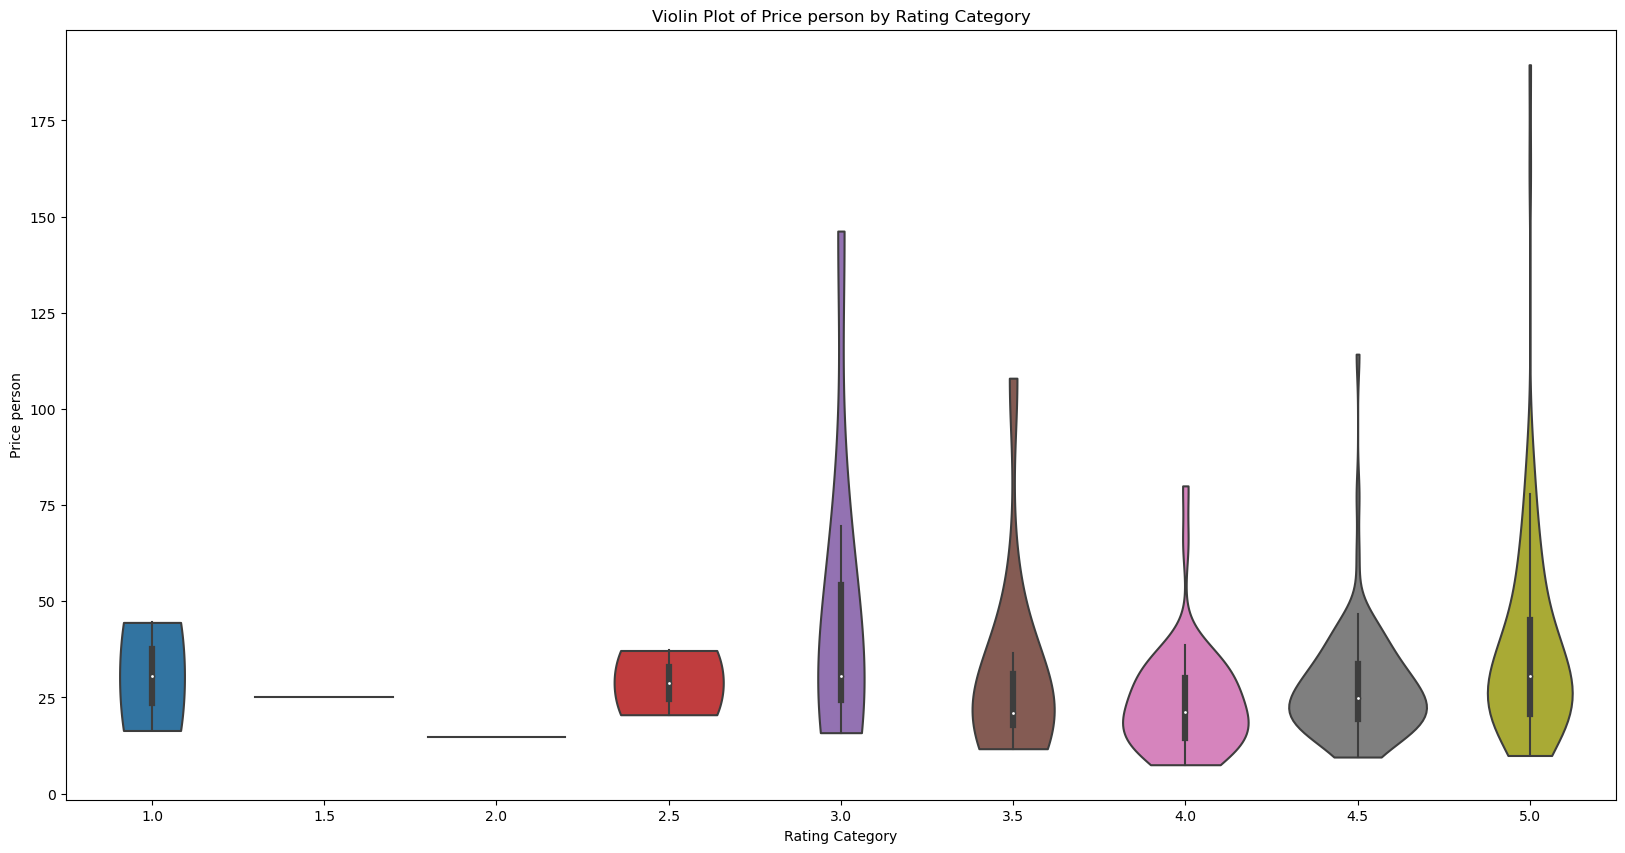

In [9]:
filtered_df = df[df['Rating Category'] != 0]
fig, ax = plt.subplots(figsize=(20, 10))

sns.violinplot(data=filtered_df, x='Rating Category', y='Price person',cut=0)
plt.xlabel('Rating Category')
plt.ylabel('Price person')
plt.title('Violin Plot of Price person by Rating Category')
plt.show()

**Interpretation of a violin plot**

The violin plot is a hybrid of a box plot and a kernel density plot. It represents the distribution of data. The difference with a box plot is that it can depict summary statistics and the density of each variable, and not only show summary statistics as a box plot does.

The white dot in the violin plot represents the median, the ticker gray bar the interquartile range and the thin gray bar the rest of the distribution, but does not include point considered as "outliers". 

Concerning the colored area, the wider the section is, the higher the probability that those values will be taken by the variables. And on the contrary, the skinnier the colored are, the lower the probability that an element will take this value.

**Interpretation of this violin plot**:
- We created the graph so that it does no go below 0 for the price because a negative price makes no sense.
- We saw with the scatter plot that there were some values higher especially around 4.5 and 5 rating stars. Thanks to the violin plot we can see that these high values have a low probability. 
- We can notice that the number of observations for the lower ratings (between 0 and 3.5 stars) are very low and make it hard to draw significant conclusions, contrary to the range between 3.5 and 5 stars where much more observations are available and where we see a clearer positive relation between the prices and the ratings.

It is difficult to draw a clear conclusion but it seems like there is a slightly positive relation between the rating and the price, especially for the last 4 vales (from 3.5 to 5). The last notebook on modelling will give more information about this relationship. 

We are aware that our sample is not very large so it is complicated to draw general conclusion, valide also outside the sample.

**To better visualise, enter the rating of your lodging (X) and see what is the mean price for that rating:**

In [10]:
# Define the value of X
X = 4

# Convert 'Price per Night' column to numeric
df['Price person'] = pd.to_numeric(df['Price person'])

# Group the data by rating and compute the mean of the prices for each rating
mean_prices = df.groupby('Rating')['Price person'].mean()

# Loop over the ratings and print the mean price when the rating is X
for rating, mean_price in mean_prices.items():
    if rating == X:
        print(f"The mean price when the rating is {X} is {mean_price:.2f}")

The mean price when the rating is 4 is 24.93


## 2. Impact of the type of annoucement

### 2.1. Does the type of announcement have an impact on the price ?

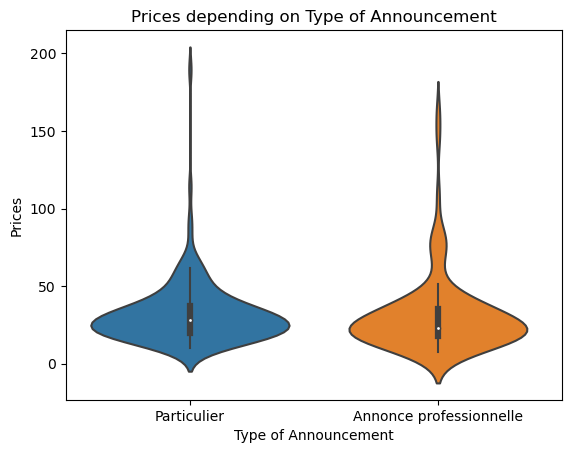

In [11]:
df_clean=df.copy()
df_clean = df_clean[df_clean['Rating Category'] != 0]
df_clean2 = df_clean[df_clean['Type of annoucement'] != 'rien']

sns.violinplot(x='Type of annoucement', y='Price person', data=df_clean2)

plt.title('Prices depending on Type of Announcement')
plt.xlabel('Type of Announcement')
plt.ylabel('Prices')
plt.show()

**Observation**

Thans to our sample, we can observe the presence of slightly higher prices when the announcement is published by private individuals, which is also shown by the mean prices of the two categories (see next command).

**The mean prices depending on the type of announcement:**

In [12]:
# Group the data by rating and compute the mean of the prices for each rating
mean_prices = df_clean2.groupby('Type of annoucement')['Price per Night'].mean()

# Print the mean prices for each rating
mean_prices

Type of annoucement
Annonce professionnelle    155.303922
Particulier                184.654321
Name: Price per Night, dtype: float64

### 2.2. Does the type of announcement have an impact on the rating ?

*Considering the positive relation we observed on the impact of the ratings on the price, and the tendancy of the price to be higher for the private announcements, we can expect the mean rating of the private annoncement to be higher.*

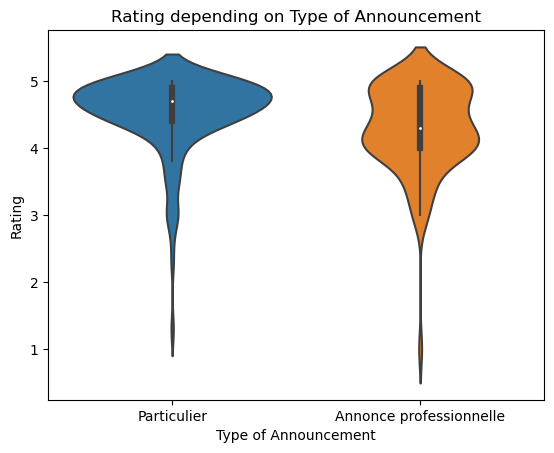

In [13]:
df_clean2 = df_clean[df_clean['Type of annoucement'] != 'rien']

sns.violinplot(x='Type of annoucement', y='Rating', data=df_clean2)

plt.title('Rating depending on Type of Announcement')
plt.xlabel('Type of Announcement')
plt.ylabel('Rating')
plt.show()

It looks like the private ads have tend to have higher rating than the professional ones in our sample.

In [14]:
#df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

mean_ratings = df_clean.groupby('Type of annoucement')['Rating'].mean()

# afficher les moyennes des ratings pour chaque rating status
print(mean_ratings)

Type of annoucement
Annonce professionnelle    4.289216
Particulier                4.536420
rien                       4.081250
Name: Rating, dtype: float64


## 3. Impact of the mention 'Premium'

### 3.1. Does the mention 'Premium' have an impact on the price ?

<AxesSubplot: xlabel='hote premium', ylabel='Price per Night'>

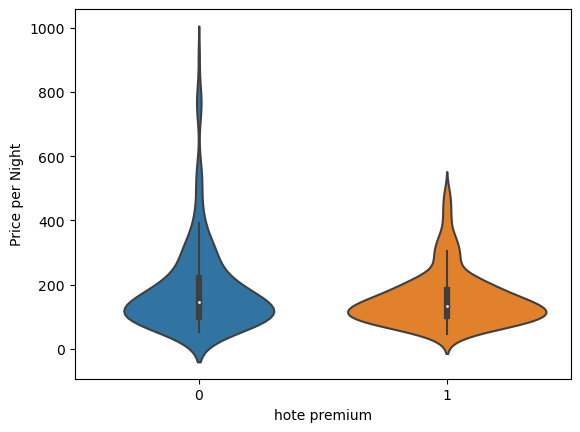

In [15]:
sns.violinplot(x='hote premium', y='Price per Night', data=df)

**Observation:**

There are a few observation with a higher price when the host is non premium, but these ones have a very low probability. We cannot conclude that the premium mention on an ad leads to a higher price. To know whether it worths to pay attention to the premium mention, we should look at whether it is linked to the rating. If it is the case, it means that premium ads have a higher rating, so better quality according to the previous customer, but without having a higher price. It would therefore be a sound criterion to look at when chosing and accommodation.

### 3.2. Does the mention 'Premium' have an impact on the rating ?

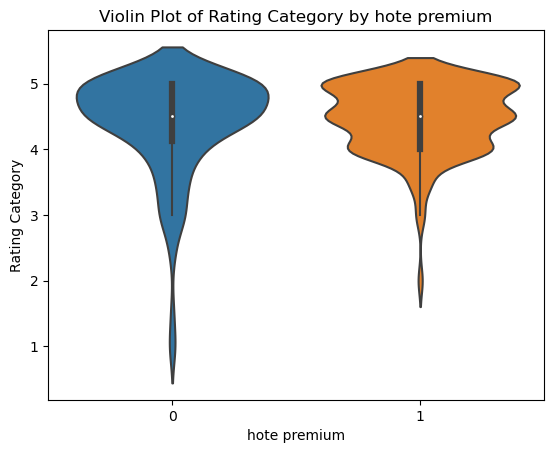

In [16]:
filtered_df = df[df['Rating Category'] != 0]

sns.violinplot(x='hote premium', y='Rating Category', data=filtered_df)
plt.xlabel('hote premium')
plt.ylabel('Rating Category')
plt.title('Violin Plot of Rating Category by hote premium')
plt.show()

**Observations**:
Premium ads tend to have less low ratings than non premium ones. Thus, it seems like it is a criterion that is worth taking into consideration when choosing an accommodation for the holidays.

# Maps

## Where are located our data

In [17]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [18]:
import folium

# Centrer la carte sur Bruxelles
map = folium.Map(location=[50.8466, 4.3517], zoom_start=8)

for Name, row in df.iterrows():
    if not pd.isna(row['latitude']) and not pd.isna(row['longitude']):
        marker=folium.Marker(location=[row['latitude'], row['longitude']]).add_to(map)
        marker.add_child(folium.Popup(row['Name']))

# Afficher la carte
map

**Observations:**

A few locations stands out in terms of number of accommodation: the coast, the ardennes and some cities like Brussels and Antwerp. Therefore, customers will have greater choice in these zones.

## 5. Does the localisation have an impact on the price?

In [19]:
pip install HeatMap

  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [7 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\32498\AppData\Local\Temp\pip-install-24f2t974\heatmap_136a448955b6415bafac5f979deccb21\setup.py", line 15
      print "On Windows, skipping build_ext."
            ^
  SyntaxError: Missing parentheses in call to 'print'. Did you mean print("On Windows, skipping build_ext.")?
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.



  Using cached heatmap-2.2.1.zip (25 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


In [20]:
from folium import plugins

m = folium.Map(location=[50.8466, 4.3517], zoom_start=7.5)

# Create a heatmap layer based on the price of each location
heatmap_data = []
for index, row in df.iterrows():
    if not pd.isna(row['latitude']) and not pd.isna(row['longitude']):
        heatmap_data.append([row['latitude'], row['longitude'], row['Price per Night']])

title_html = '<h3 align="center" style="font-size:16px"><b>Map depending on price</b></h3>'
m.get_root().html.add_child(folium.Element(title_html))

# Add the heatmap layer to the map
plugins.HeatMap(heatmap_data, name='Price heatmap').add_to(m)
m

**Observation:**

 We can see that the prices are higher at the coast, the ardennes and Brussels. Therefore, despite the fact that there are more offers in these areas, the prices are higher. 

## 6. Does the localisation have an impact on the rating?

In [21]:
from folium import plugins

m2 = folium.Map(location=[50.8466, 4.3517], zoom_start=7.5)

# Create a heatmap layer based on the price of each location
heatmap_data_2 = []
for index, row in df.iterrows():
    if not pd.isna(row['latitude']) and not pd.isna(row['longitude']):
        heatmap_data.append([row['latitude'], row['longitude'], row['Rating']])

title_html = '<h3 align="center" style="font-size:16px"><b>Map depending on rating</b></h3>'
m2.get_root().html.add_child(folium.Element(title_html))
# Add the heatmap layer to the map
plugins.HeatMap(heatmap_data, name='Rating heatmap').add_to(m2)
m2

**Once again, we can notice the similarities in the relation between the price and the rating.**

### Conclusion 

**We can conclude that :**
1. The choice is larger for houses and apartment than for the other types of accommodation.
2. It seems that the prices and the ratings may be positively correlated because our graphs showed slight positive trends. However we think that with a bigger sample, it would be clearer.
3. Private accomodations tend to be more a bit expensive than professional ones, and tend to have a higher rating.
4. There is not a big difference in terms of price between professional and private ads, but professional ones tend to have fewer observations with low rating.
5. The accomodation in less concentrated zones are more likely to be cheaper.


**So can we say that ...?**
To determine what is the best accommodation for holidays in Belgium, it depends on what matters to the customers. If price is the main decision criterion, then the customer should focus on location with fewer offers and private ads that tend to be slightly cheaper. However, it is in spite of other criteria. Location with cheaper prices are often less touristic, so there might be fewer things to do. Moreover, cheaper prices may lead to lower quality, even if there are some outliers. Looking for the best price to quality ratio, it seems like premium ads are not especially more expensive but have higher rating overall. 

As a conclusion, what was done in this notebook is giving keys to visualise the data and see some link between them. It can help in choosing an accommodation but in the end, it depends on the preferences of the consumers.